#

Advanced Pandas City Cemetary

1. Read the City Cemetery data into a pandas DataFrame. Hint: see the read_excel function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cc_df = pd.read_excel("../data/Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx")

In [3]:
cc_df = cc_df.dropna()
cc_df

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
5,6W,"Woolwine, Earl G.",Mar,3.0,16.0,1977.0,M,W,85.0,"San Marcos, Texas",Old Age,Mulberry,lot 25,west 11- sect..
6,6W,"Wadley, Sarah Vaughn",May,5.0,17.0,1977.0,F,W,73.0,Texas,Old Age,Elm,lot 17,4-sect..
7,6W,"White, Cora Bell",Nov,11.0,6.0,1977.0,F,W,93.0,"Houston, Nashville",Old Age,Turnpike,lot 21,"15a , White, William C. lot"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19733,4-1846,"Stephenson, William",Sep,9.0,19.0,1846.0,M,W,2.0,Country,Measles,Cedar,lot,son of James Stephenson
19736,4-1846,"Holsole, John",Sep,9.0,24.0,1846.0,M,B,48.0,City,Diarherea,Poplar,pauper,known by the name of Indian John
19738,4-1846,Emmily,Sep,9.0,25.0,1846.0,F,B,16.0,City,Feever,Poplar,200,slave to J. Chappell
19740,4-1846,"Kingsley, A., Capt.",Sep,9.0,28.0,1846.0,M,W,67.0,City,Feever,Cedar,lot,superintendent of Nashville Cemetery


2. Most Common Causes of Death.

a. Find the 10 most common (known) recorded causes of death.

In [4]:
kn_df = cc_df[~cc_df['Cause of Death/Burial'].isin(['Unknown', 'Not Known'])]
kn_df['Cause of Death/Burial'].value_counts().head(10)

Cause of Death/Burial
Consumption      995
Old Age          428
Cholera          354
Cholrea          322
Pneumonia        244
Flux             213
Typhoid Fever    193
Dropsy           170
Complicated      162
Cold             156
Name: count, dtype: int64

b. Clean up some of the misspellings. Use the replace method to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".

In [5]:
kn_df = kn_df.replace('Cholrea', 'Cholera').replace('Still Born', 'Stillborn')
kn_df['Cause of Death/Burial'].value_counts().head(10)

Cause of Death/Burial
Consumption      995
Cholera          676
Old Age          428
Pneumonia        244
Flux             213
Typhoid Fever    193
Dropsy           170
Complicated      162
Cold             156
Complication     129
Name: count, dtype: int64

c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.

In [6]:
top_df = kn_df['Cause of Death/Burial'].value_counts().head(10)

<Axes: xlabel='Cause of Death/Burial'>

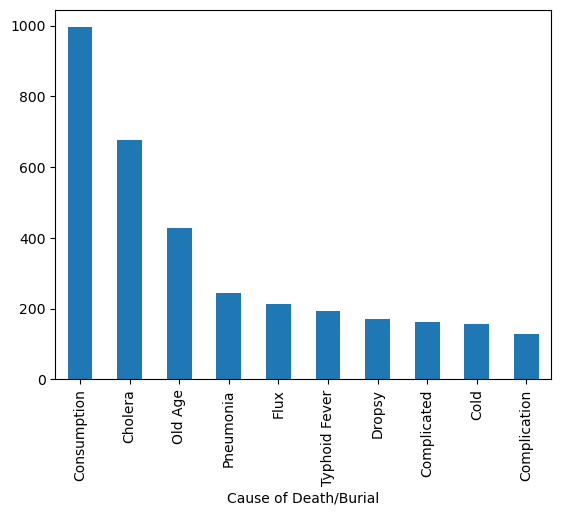

In [7]:
top_df.plot(kind='bar')

3. Create a line chart showing the number of burials per year.

<Axes: xlabel='Burial Year'>

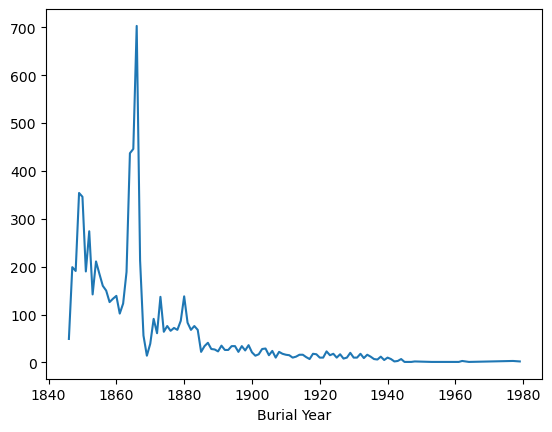

In [8]:
ln_df =  cc_df['Burial Year'].value_counts().sort_index()
ln_df.plot(kind='line')

4. Burials per Month and Year

a. Use the crosstab function to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.

In [9]:
pd.crosstab(cc_df['Burial Year'],cc_df['Burial Month'] )

Burial Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Burial Year,,,,,,,,,,,,
1846.0,0,0,18,0,0,0,0,0,0,8,10,13
1847.0,13,24,16,11,17,6,20,18,9,22,23,20
1848.0,13,19,7,23,16,28,25,19,21,6,10,4
1849.0,20,11,13,32,13,49,114,42,32,9,8,11
1850.0,12,23,15,12,6,157,47,21,16,17,9,11
...,...,...,...,...,...,...,...,...,...,...,...,...
1961.0,0,0,0,0,0,0,0,1,0,0,0,0
1962.0,0,0,1,0,0,0,0,1,0,1,0,0
1964.0,0,0,0,0,0,0,0,0,0,1,0,0


b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.

In [13]:
cc_df['Burial Year']= cc_df['Burial Year'].astype(int)

# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
# #           'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']

pd.crosstab(cc_df['Burial Year'],cc_df['Burial Month']).sort_index(axis=1, ascending=True)[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                                                            'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']]


Burial Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Burial Year,,,,,,,,,,,,
1846,0,0,0,0,0,0,0,0,13,10,8,18
1847,17,11,18,13,9,20,6,24,20,23,22,16
1848,16,23,19,13,21,25,28,19,4,10,6,7
1849,13,32,42,20,32,114,49,11,11,8,9,13
1850,6,12,21,12,16,47,157,23,11,9,17,15
...,...,...,...,...,...,...,...,...,...,...,...,...
1961,0,0,1,0,0,0,0,0,0,0,0,0
1962,0,0,1,0,0,0,0,0,0,0,1,1
1964,0,0,0,0,0,0,0,0,0,0,1,0


c. Filter your table to show only the years 1846 through 1860.